In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("health_dataset_with_issues.csv")

In [4]:
df.head()

,Age,Sex,BMI,Smoker,AlcoholConsumption,PhysicalActivity,DietQuality,BloodPressure,GlucoseLevel,CholesterolLevel,...,Diabetes,Hypertension,Asthma,KidneyDisease,LiverDisease,Cancer,Obesity,Arthritis,COPD,MentalHealthIssue
0,56.0,Male,18.0,Yes,High,Active,Good,Hypertension,181.0,186.0,...,No,No,Yes,NaN,Yes,Yes,Yes,Yes,No,Yes
1,69.0,Male,33.3,No,Moderate,Sedentary,Poor,Hypertension,127.0,259.0,...,Yes,NaN,Yes,No,Yes,Yes,Yes,No,Yes,No
2,46.0,Female,19.8,No,Moderate,Sedentary,Good,NaN,147.0,219.0,...,No,No,Yes,Yes,Yes,No,Yes,No,Yes,No
3,32.0,Male,17.9,Yes,Moderate,Sedentary,Good,Normal,144.0,131.0,...,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No
4,60.0,Male,25.5,No,Moderate,Active,Good,Prehypertension,111.0,185.0,...,No,Yes,No,No,No,Yes,No,Yes,Yes,Yes


In [5]:
df.shape

(1000, 22)

In [9]:
df.isna().sum()

Age                   0
Sex                   0
BMI                   0
Smoker                0
AlcoholConsumption    0
PhysicalActivity      0
DietQuality           0
BloodPressure         0
GlucoseLevel          0
CholesterolLevel      0
FamilyHistory         0
HeartDisease          0
Diabetes              0
Hypertension          0
Asthma                0
KidneyDisease         0
LiverDisease          0
Cancer                0
Obesity               0
Arthritis             0
COPD                  0
MentalHealthIssue     0
dtype: int64

In [8]:
import pandas as pd
df=pd.read_csv("health_dataset_with_issues.csv")
missing_values = df.isnull().sum()
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)
cleaned_missing = df.isnull().sum()
cleaned_missing.head(), cleaned_missing.sum()

(Age                   0
 Sex                   0
 BMI                   0
 Smoker                0
 AlcoholConsumption    0
 dtype: int64,
 0)

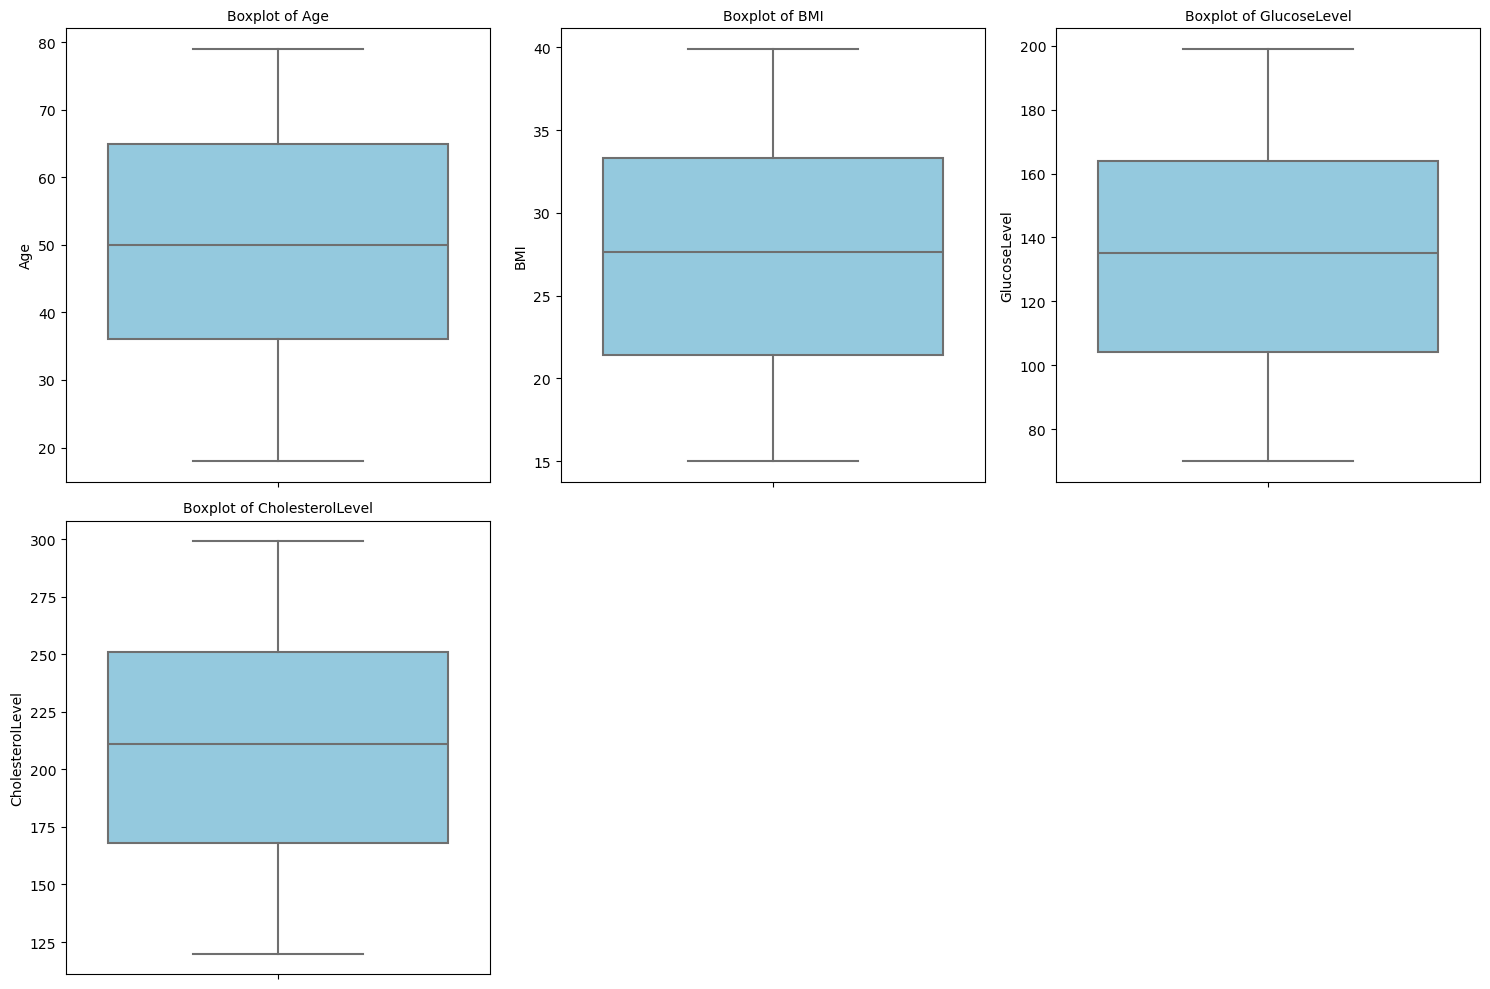

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=10)
plt.tight_layout()
plt.show()

In [11]:
from scipy.stats import zscore
import numpy as np
z_scores = np.abs(zscore(df[numeric_cols]))
outliers = (z_scores > 3).any(axis=1)
print(f"Total outliers detected: {outliers.sum()}")

Total outliers detected: 0
